# Linear Regression

In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets

import matplotlib.pyplot as plt

epoch:  10, loss=803.9917
epoch:  20, loss=669.6559
epoch:  30, loss=576.7214
epoch:  40, loss=512.4272
epoch:  50, loss=467.9459
epoch:  60, loss=437.1716
epoch:  70, loss=415.8796
epoch:  80, loss=401.1482
epoch:  90, loss=390.9555
epoch: 100, loss=383.9031


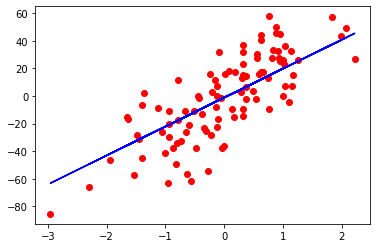

In [5]:
# Prepare data 
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=2022)

n_samples, n_features = X.shape

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32)) #y is 1-row vector

#Reshape y to n-rows: 1 col
y = y.view(y.shape[0], 1) 



#1. Model
input_size = n_features
output_size = 1 #regression
model = nn.Linear(input_size, output_size)

#2. Loss and Optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3. Training Loop
num_epochs = 100
for epoch in range(num_epochs):
    #forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    #backward pass
    loss.backward()
    #update weights
    optimizer.step()
    optimizer.zero_grad() #zero the gradient

    if (epoch + 1) % 10 == 0:
        print(f"epoch: {epoch + 1: >3,}, loss={loss.item():.4f}")
#plot
#detach the tensor from gradient
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b-')
plt.show()

